# PMF Output Validation Example

This notebook demonstrates how to use the OutputValidator class to validate PMF results against reference profiles and ratio criteria.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the OutputValidator class
from PMF_toolkits.validation import OutputValidator
from PMF_toolkits import PMF

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Initialize the validator

First, we'll initialize the validator with a site name and data directory. The validator can work with both single-site and multi-site PMF outputs.

In [2]:
# Define data directory
data_dir = "single_site"  # Path to PMF output files
site_name = "GRE-fr"      # Site name

# Create a validator
validator = OutputValidator(
    site=site_name, 
    bdir=data_dir,
    reference_dir="reference_data"  # Path to reference data files (Source_reference_profiles.csv and Ratio.xlsx)
)

# Load PMF data (happens automatically when needed)
print(f"Validator initialized for site: {site_name}")

Initialized XlsxReader for site 'GRE-fr' with multisites=False
Total variable set to: PM10recons
Successfully read base profiles with shape (36, 11)
Found multiple 'Factor Contributions' sections, using first section
Successfully read base contributions with shape (125, 11)
Successfully read base bootstrap with 101 runs
Loading base uncertainty summary from: single_site\GRE-fr_BaseErrorEstimationSummary.xlsx
Read base DISP swap data: {'Mineral dust': 0, 'Industrial': 0, 'Aged sea salt': 0, 'Biomass burning': 0, 'Nitrate-rich': 0, 'MSA-rich': 0, 'Sea/road salt': 0, 'Sulfate-rich': 0, 'Secondary biogenic oxidation': 0, 'Primary biogenic': 0, 'Primary traffic': 0}
Successfully read base uncertainties summary with shape (396, 12)
Successfully read constrained profiles with shape (36, 11)
Found multiple 'Factor Contributions' sections, using first section
Successfully read constrained contributions with shape (125, 11)
Successfully read constrained bootstrap with 101 runs
Loading constraine

In [3]:
validator.load_source_profiles()

,Id,Name,Specie,Relative Mass,Uncertainty,Analythical Method,Uncertainty Method,Specie Id,Particle Size,Original Name,...,Reference,Country,Place,Test Year,Profile Type,Sampling Method,Latitude,Longitude,Cas,Symbol
0,1,Cement,Aluminum,0.018609,0.003790,NaN,95% confidence interval,292.0,PM10,CEMENT,...,"Larsen,2012,10.1016/j.atmosenv.2011.12.038",Italy,"Po Valley, Valtelline",2008.0,C,Form bibliography,45.4773,9.1815,7429-90-5,Al
1,1,Cement,Antimony,0.000012,0.000008,NaN,95% confidence interval,296.0,PM10,CEMENT,...,"Larsen,2012,10.1016/j.atmosenv.2011.12.038",Italy,"Po Valley, Valtelline",2008.0,C,Form bibliography,45.4773,9.1815,7440-36-0,Sb
2,1,Cement,Arsenic,0.000015,0.000003,NaN,95% confidence interval,298.0,PM10,CEMENT,...,"Larsen,2012,10.1016/j.atmosenv.2011.12.038",Italy,"Po Valley, Valtelline",2008.0,C,Form bibliography,45.4773,9.1815,7440-38-2,As
3,1,Cement,Cadmium,0.000008,0.000004,NaN,95% confidence interval,328.0,PM10,CEMENT,...,"Larsen,2012,10.1016/j.atmosenv.2011.12.038",Italy,"Po Valley, Valtelline",2008.0,C,Form bibliography,45.4773,9.1815,7440-43-9,Cd
4,1,Cement,Calcium,0.386055,0.020188,NaN,95% confidence interval,329.0,PM10,CEMENT,...,"Larsen,2012,10.1016/j.atmosenv.2011.12.038",Italy,"Po Valley, Valtelline",2008.0,C,Form bibliography,45.4773,9.1815,7440-70-2,Ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8798,291,Sulphate,Elemental Carbon,0.024104,0.006470,NaN,standard deviation,797.0,PM10,Sulphate,...,"Cesari et al., 2016, doi.org/10.1016/j.atmosre...",Italy,"Civitavecchia, Torrevaldaliga Nord",2014.0,D,Constrained PMF5 was run on an unified dataset...,42.1269,11.7583,7440-44-0,EC
8799,291,Sulphate,Bromine,0.000254,0.000027,NaN,standard deviation,810.0,PM10,Sulphate,...,"Cesari et al., 2016, doi.org/10.1016/j.atmosre...",Italy,"Civitavecchia, Torrevaldaliga Nord",2014.0,D,Constrained PMF5 was run on an unified dataset...,42.1269,11.7583,10097-32-2,Br
8800,291,Sulphate,Potassium ion,0.005016,0.001238,NaN,standard deviation,2302.0,PM10,Sulphate,...,"Cesari et al., 2016, doi.org/10.1016/j.atmosre...",Italy,"Civitavecchia, Torrevaldaliga Nord",2014.0,D,Constrained PMF5 was run on an unified dataset...,42.1269,11.7583,24203-36-9,K+
8801,291,Sulphate,Calcium ion,0.000000,0.000000,NaN,standard deviation,2303.0,PM10,Sulphate,...,"Cesari et al., 2016, doi.org/10.1016/j.atmosre...",Italy,"Civitavecchia, Torrevaldaliga Nord",2014.0,D,Constrained PMF5 was run on an unified dataset...,42.1269,11.7583,14127-61-8,Ca2+


## 2. Check Species Ratios

Species ratios can be valuable indicators of source types. For example, the OC/EC ratio helps differentiate between different combustion sources.

In [4]:
# Calculate OC/EC ratio for a specific factor
factor_name = 'Biomass burning' # validator.pmf.profiles[0]  # Use first available factor
print(f"Using factor: {factor_name}")

try:
    # Calculate OC/EC ratio
    ratio = validator.calculate_ratio(factor_name, "Levoglucosan", "Mannosan")
    if np.isnan(ratio):
        print("Could not calculate OC/EC ratio (one or both species not found or zero value)")
    else:
        print(f"OC/EC ratio for {factor_name}: {ratio:.2f}")

    # Compare with reference values
    ratio_result = validator.compare_ratio(factor_name, "OC*", "EC")
    if ratio_result.get("success", False):
        print("\nFound matching source type(s):")
        for match in ratio_result["matches"]:
            print(f"- {match['Source']} (expected range: {match['Min']:.2f}-{match['Max']:.2f})")
    else:
        print("\nNo matching source types found for this ratio")
except Exception as e:
    print(f"Error during ratio calculation: {str(e)}")
    
    # Show available species for debugging
    print("\nAvailable species:")
    print(validator.pmf.species)

Using factor: Biomass burning
OC/EC ratio for Biomass burning: 8.93

Found matching source type(s):
- Biomass burning (expected range: 3.00-10.60)
- Biomass burning (expected range: 2.30-17.70)
- Traffic (expected range: 1.34-3.70)


In [5]:
# Calculate ratios for a specific factor
factor_name = 'Biomass burning'  # validator.pmf.profiles[0]  # Use first available factor
print(f"Using factor: {factor_name}")

try:
    # Calculate Levoglucosan/Mannosan ratio (typical for biomass burning source identification)
    levo_manno_ratio = validator.calculate_ratio(factor_name, "Levoglucosan", "Mannosan")
    if np.isnan(levo_manno_ratio):
        print("Could not calculate Levoglucosan/Mannosan ratio (one or both species not found or zero value)")
    else:
        print(f"Levoglucosan/Mannosan ratio for {factor_name}: {levo_manno_ratio:.2f}")
        
    # Also calculate OC/EC ratio (another important marker for combustion sources)
    oc_ec_ratio = validator.calculate_ratio(factor_name, "OC*", "EC")
    if np.isnan(oc_ec_ratio):
        print("Could not calculate OC/EC ratio (one or both species not found or zero value)")
    else:
        print(f"OC/EC ratio for {factor_name}: {oc_ec_ratio:.2f}")

    # Compare OC/EC ratio with reference values
    ratio_result = validator.compare_ratio(factor_name, "OC*", "EC")
    if ratio_result.get("success", False):
        print("\nFound matching source type(s) for OC/EC ratio:")
        for match in ratio_result["matches"]:
            print(f"- {match['Source']} (expected range: {match['Min']:.2f}-{match['Max']:.2f})")
    else:
        print("\nNo matching source types found for OC/EC ratio")
        
    # Compare Levoglucosan/Mannosan ratio with reference values
    levo_ratio_result = validator.compare_ratio(factor_name, "Levoglucosan", "Mannosan")
    if levo_ratio_result.get("success", False):
        print("\nFound matching source type(s) for Levoglucosan/Mannosan ratio:")
        for match in levo_ratio_result["matches"]:
            print(f"- {match['Source']} (expected range: {match['Min']:.2f}-{match['Max']:.2f})")
    else:
        print("\nNo matching source types found for Levoglucosan/Mannosan ratio")
        
except Exception as e:
    print(f"Error during ratio calculation: {str(e)}")
    
    # Show available species for debugging
    print("\nAvailable species:")
    print(validator.pmf.species)

Using factor: Biomass burning
Levoglucosan/Mannosan ratio for Biomass burning: 8.93
OC/EC ratio for Biomass burning: 3.58

Found matching source type(s) for OC/EC ratio:
- Biomass burning (expected range: 3.00-10.60)
- Biomass burning (expected range: 2.30-17.70)
- Traffic (expected range: 1.34-3.70)

Found matching source type(s) for Levoglucosan/Mannosan ratio:
- Biomass burning (expected range: 3.00-10.00)
- Biomass burning (expected range: 2.00-33.30)


## 3. Compare with Reference Profiles

Now we'll compare our PMF factors with reference profiles from the literature.

In [6]:
# Calculate similarity metrics for a factor
metrics = validator.calculate_similarity_metrics(factor_name)
# Display the top 5 best matches
print(f"Top 5 matches for {factor_name} by Pearson Distance (PD):")
display(metrics.sort_values('PD').head(5))

# Find similar sources using thresholds
similar_sources = validator.find_similar_sources(
    factor_name,
    pd_threshold=0.4,   # Maximum Pearson Distance
    sid_threshold=0.8,  # Maximum Standardized Identity Distance
    min_species=5       # Minimum number of shared species
)

print(f"\nMatching sources (PD < 0.4, SID < 0.8, shared species >= 5):")
display(similar_sources)

Top 5 matches for Biomass burning by Pearson Distance (PD):


,Reference ID,Reference Name,Place,Particle Size,SID,PD,Shared Species,Common Species
46,47,Exhaust,Copenhagen,PM2.5,0.706569,0.001265,8,"Aluminum, Arsenic, Iron, Manganese, Rubidium, ..."
196,210,Ship auxiliary engine at 25% load,sea,PM2.5,0.948225,0.003945,12,"Antimony, Cadmium, Calcium, Copper, Elemental ..."
50,51,Exhaust,Copenhagen,PM10,0.762362,0.004222,6,"Arsenic, Iron, Rubidium, Selenium, Vanadium, Zinc"
184,187,Oak closed fireplace,Wien,PM10,0.635842,0.005711,20,"Aluminum, Ammonium, Chloride ion, Chromium, Co..."
274,290,Traffic,"Civitavecchia, Torrevaldaliga Nord",PM10,0.776520,0.008727,15,"Aluminum, Ammonium, Copper, Elemental Carbon, ..."



Matching sources (PD < 0.4, SID < 0.8, shared species >= 5):


,Reference ID,Reference Name,Place,Particle Size,SID,PD,Shared Species,Common Species
46,47,Exhaust,Copenhagen,PM2.5,0.706569,0.001265,8,"Aluminum, Arsenic, Iron, Manganese, Rubidium, ..."
50,51,Exhaust,Copenhagen,PM10,0.762362,0.004222,6,"Arsenic, Iron, Rubidium, Selenium, Vanadium, Zinc"
184,187,Oak closed fireplace,Wien,PM10,0.635842,0.005711,20,"Aluminum, Ammonium, Chloride ion, Chromium, Co..."
274,290,Traffic,"Civitavecchia, Torrevaldaliga Nord",PM10,0.776520,0.008727,15,"Aluminum, Ammonium, Copper, Elemental Carbon, ..."
7,8,Closed fireplace Wood Burning,"Po Valley, Valtelline",PM10,0.784574,0.051953,23,"Aluminum, Ammonium, Antimony, Arsenic, Cadmium..."
67,68,Ceramic Pottery factories (wood burning),Bailén,PM2.5,0.791825,0.053067,18,"Arsenic, Cadmium, Calcium, Chromium, Copper, E..."
21,22,Closed fireplace Beech Combustion,Valtelline,TSP,0.696905,0.077837,15,"Aluminum, Calcium, Chromium, Copper, Elemental..."
270,286,Biomass Burning,"Civitavecchia, Torrevaldaliga Nord",PM10,0.798382,0.082389,15,"Aluminum, Ammonium, Copper, Elemental Carbon, ..."
20,21,Closed fireplace Pine Combustion,Valtelline,TSP,0.761043,0.085149,17,"Aluminum, Ammonium, Calcium, Chromium, Copper,..."
238,252,Olive pit,Aveiro,PM10,0.748922,0.089406,15,"Aluminum, Arsenic, Calcium, Chromium, Copper, ..."


## 4. Visualize Similarity Diagram

Create a source similarity diagram to visualize how the factor compares with reference profiles.

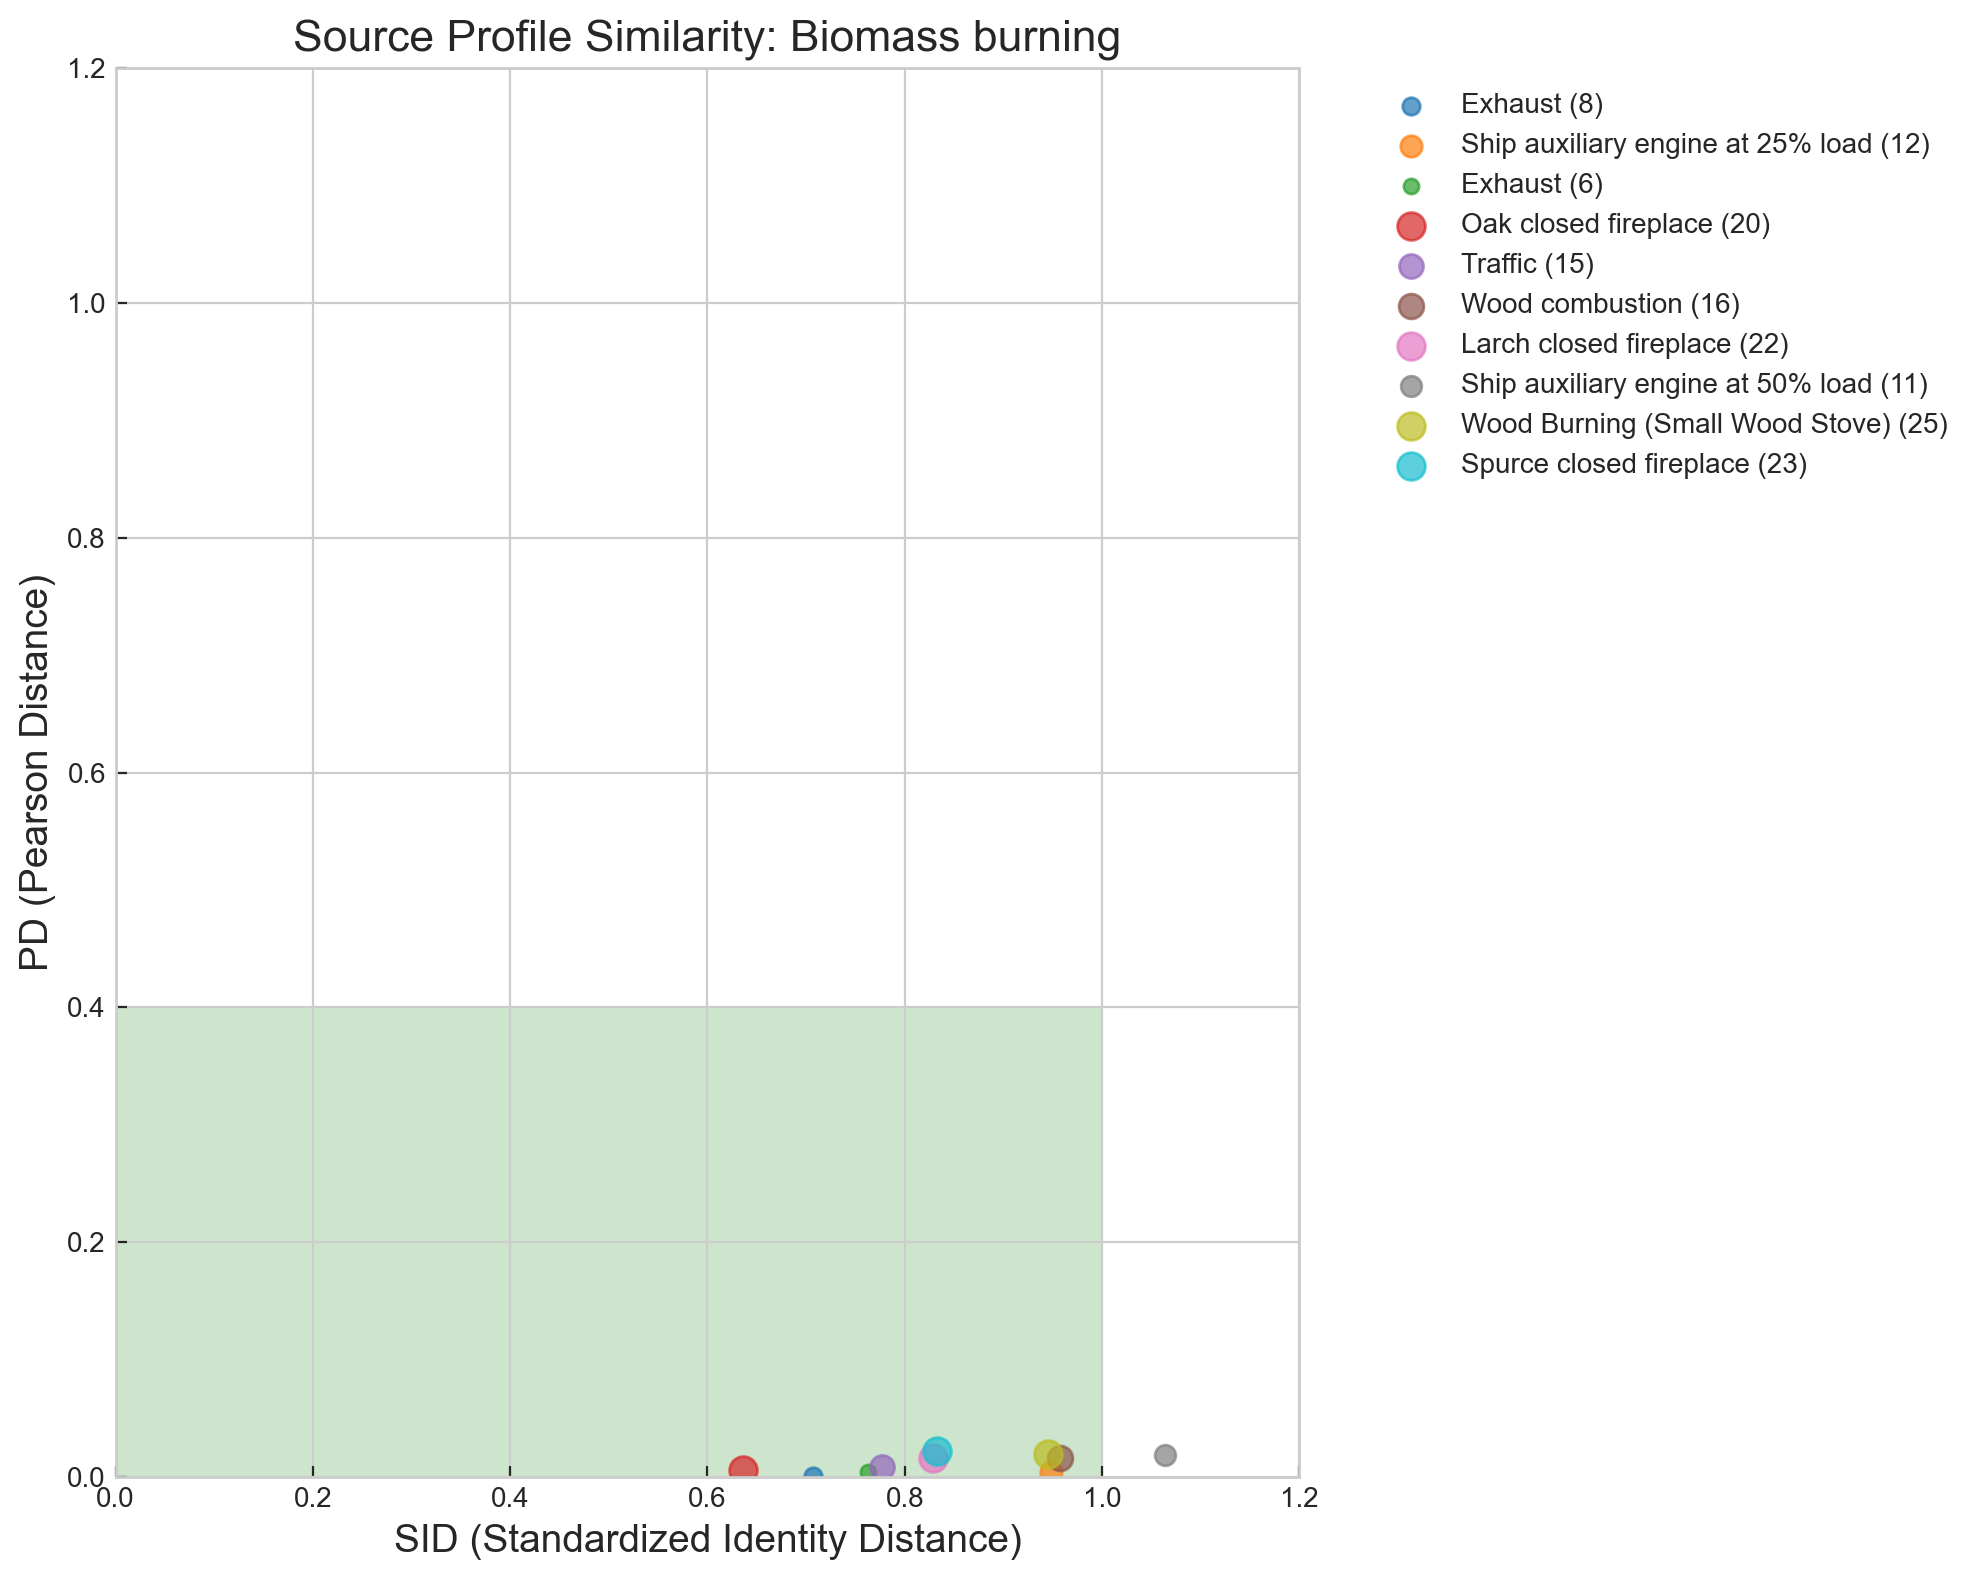

In [7]:
# Plot similarity diagram
fig = validator.plot_similarity_diagram(factor_name, max_sources=10)
plt.tight_layout()
plt.show()

## 5. Working with Multiple Factors

Let's check all factors in our PMF solution.

In [8]:
# Get list of factors from the PMF object
factors = validator.pmf.profiles

# Process each factor
for factor in factors:
    print(f"\n========== {factor} ==========")
    
    # Get best match by Pearson Distance
    metrics = validator.calculate_similarity_metrics(factor)
    best_match = metrics.sort_values('PD').iloc[0]
    
    print(f"Best match: {best_match['Reference Name']}")
    print(f"PD: {best_match['PD']:.3f}, SID: {best_match['SID']:.3f}, Shared species: {best_match['Shared Species']}")
    
    # Check key species ratios
    if "OC" in validator.pmf.species and "EC" in validator.pmf.species:
        oc_ec = validator.calculate_ratio(factor, "OC", "EC")
        print(f"OC/EC ratio: {oc_ec:.2f}")
        
    if "K+" in validator.pmf.species and "SO42-" in validator.pmf.species:
        k_so4 = validator.calculate_ratio(factor, "K+", "SO42-")
        print(f"K+/SO4 ratio: {k_so4:.3f}")


========== Mineral dust ==========
Best match: Salt
PD: 0.000, SID: 0.629, Shared species: 10
K+/SO4 ratio: 0.084

========== Industrial ==========
Best match: Traffic
PD: 0.046, SID: 0.830, Shared species: 14
K+/SO4 ratio: 0.419

========== Aged sea salt ==========
Best match: Exhaust
PD: 0.001, SID: 0.946, Shared species: 6
K+/SO4 ratio: 0.768

========== Biomass burning ==========
Best match: Exhaust
PD: 0.001, SID: 0.707, Shared species: 8
K+/SO4 ratio: 2.112

========== Nitrate-rich ==========
Best match: Ship auxiliary engine at 75% load
PD: 0.000, SID: 0.945, Shared species: 10
K+/SO4 ratio: 0.037

========== MSA-rich ==========
Best match: Tyre wear on road dust
PD: 0.001, SID: 1.229, Shared species: 12
K+/SO4 ratio: 0.016

========== Sea/road salt ==========
Best match: Ship auxiliary engine at 25% load
PD: 0.002, SID: 0.810, Shared species: 12
K+/SO4 ratio: 0.055

========== Sulfate-rich ==========
Best match: Ship auxiliary engine at 50% load
PD: 0.002, SID: 0.928, Shared s

2025-04-25 14:13:43,184 - PMF_toolkits.validation - WARNING - Denominator species 'SO42-' has zero or NaN value, cannot calculate ratio


Best match: Exhaust
PD: 0.000, SID: 0.803, Shared species: 6
K+/SO4 ratio: nan


## 6. Extract Regression Diagnostics

R² values for each species can help evaluate how well the PMF model explains the observations.

In [9]:
# Extract regression diagnostics
r2_data = validator.read_regression_diagnostics()

if not r2_data.empty:
    # Display R² values
    print("R² values for species in the PMF solution:")
    display(r2_data)
    
    # Plot species with low R² values (<0.6)
    low_r2_species = r2_data[r2_data["r^2"] < 0.6].index
    
    if len(low_r2_species) > 0:
        print(f"\nSpecies with low R² values (<0.6):")
        for species in low_r2_species:
            print(f"- {species}: {r2_data.loc[species, 'r^2']:.3f}")
else:
    print("Regression diagnostics not available in the PMF output file")

R² values for species in the PMF solution:


2,Intercept,Slope,SE,r^2,Stat,P Value
Species,,,,,,
PM10recons,0.073399,0.989945,1.116572,0.982175,0.079762,0.404203
OC*,-0.042199,0.993941,0.476667,0.947379,0.032954,0.999231
EC,0.063121,0.90835,0.175888,0.960257,0.078551,0.423492
Cl-,0.001415,0.973778,0.014889,0.988755,0.146554,0.009313
NO3-,-0.045585,1.029101,0.155301,0.996481,0.109547,0.099549
SO42-,0.379642,0.674983,0.284731,0.854757,0.056431,0.820898
Na+,0.001703,0.986245,0.012505,0.990259,0.071988,0.536277
NH4+,0.030592,0.928837,0.117288,0.984147,0.05354,0.866141
K+,0.011217,0.871335,0.024529,0.944353,0.048939,0.92565



Species with low R² values (<0.6):
- Cellulose: 0.489
- Mo: 0.378
- Sb: 0.038
